
# Data Science Project:clean ,visualize, make Desriptive Statistics,and also Answers of Questions about Data (Netflix Dataset)

## Steps that  should follow
<ul>
<li><a href="#Dataset Information">Dataset Information</a></li>
<li><a href="#Gat">Gathering</a></li>
<li><a href="#Asse">Assessing</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Comment">Type Comment for Every Graph or Plot</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import classification_report

<a id='Dataset Information'></a>
>(Netflix Dataset)
1. This data set contains information about 10,000 movies collected from The netflex Movie Database 
2. It's including object and float types of values 
 1. object data as 
   (original_title) it is containing the names of movies /  imdb_id / cast / director and  homepage it is containing the links of movies
 2. And about float data like ratings and revenue.

3. Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)characters.

### For the regression model 
###### the dependent variable is 
>revenue (y_response)
###### independent variables are
>popularity ,budget , vote count

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
df=pd.read_csv('Netflix_data.csv')


## Exploratory Data Set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   float64
 1   imdb_id               998 non-null    object 
 2   popularity            1000 non-null   float64
 3   budget                997 non-null    float64
 4   revenue               1000 non-null   float64
 5   original_title        1000 non-null   object 
 6   cast                  992 non-null    object 
 7   homepage              397 non-null    object 
 8   director              997 non-null    object 
 9   tagline               731 non-null    object 
 10  keywords              805 non-null    object 
 11  overview              999 non-null    object 
 12  runtime               1000 non-null   float64
 13  genres                997 non-null    object 
 14  production_companies  930 non-null    object 
 15  release_date       

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1000.000000,1000.000000,9.970000e+02,1.000000e+03,1000.000000,996.000000,998.000000,1000.000000,9.990000e+02,9.980000e+02
mean,269536.521000,1.209498,1.508424e+07,4.919896e+07,98.507000,371.839357,5.922545,2014.629000,1.388108e+07,4.507985e+07
std,68452.032477,2.227810,3.637372e+07,1.491661e+08,23.848243,769.723515,1.053705,0.483314,3.346940e+07,1.371911e+08
min,189.000000,0.003920,0.000000e+00,0.000000e+00,0.000000,10.000000,2.400000,2014.000000,0.000000e+00,0.000000e+00
25%,240281.750000,0.300295,0.000000e+00,0.000000e+00,89.000000,23.000000,5.300000,2014.000000,0.000000e+00,0.000000e+00
50%,279986.000000,0.535901,0.000000e+00,0.000000e+00,97.000000,75.000000,5.900000,2015.000000,0.000000e+00,0.000000e+00
75%,322094.500000,1.229218,1.100000e+07,1.564062e+07,109.000000,300.000000,6.700000,2015.000000,1.012000e+07,1.418953e+07
max,395883.000000,32.985763,2.800000e+08,1.513529e+09,300.000000,6498.000000,8.900000,2015.000000,2.575999e+08,1.392446e+09


In [5]:
df.shape

(10866, 21)

>so the dataset is consisting of 10866 rows and 21 columns dividing of 10 columns which are float and 11 columns of object



## Cleaning the data  

>check if their is any duplicated data

In [6]:
df.duplicated().sum()

9869

In [7]:
df=df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(997, 21)

after founding 9869 values are dubicated and got ride of them the data become 994 rows & certainly the columns wasn't affected

>what about missing values?

In [10]:
df.isna().sum()

id                        1
imdb_id                   3
popularity                1
budget                    4
revenue                   1
original_title            1
cast                      9
homepage                604
director                  4
tagline                 270
keywords                196
overview                  2
runtime                   1
genres                    4
production_companies     71
release_date              1
vote_count                5
vote_average              3
release_year              1
budget_adj                2
revenue_adj               3
dtype: int64

In [11]:
df[df['id'].isna()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> As it's obvious this row doesn't matter in the data because all of the values are nan so we have to remove it

In [12]:
df.dropna(subset=['id','imdb_id'],inplace=True)

In [13]:
df['budget'].fillna(df['budget'].mean(),inplace=True)

In [14]:
df['cast'].value_counts()

Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vincent D'Onofrio|Nick Robinson    1
Angelina Jolie|Elle Fanning|Juno Temple|Sharlto Copley|Isobelle Molloy         1
Olivia Cooke|Ana Coto|Daren Kagasoff|Bianca A. Santos|Douglas Smith            1
Jay Baruchel|Gerard Butler|Kristen Wiig|Jonah Hill|Cate Blanchett              1
Maika Monroe|Keir Gilchrist|Olivia Luccardi|Lili Sepe|Bailey Spry              1
                                                                              ..
Luke Goss|Dolph Lundgren|Chuck Liddell|Noah Segan|Steven Luke                  1
Munro Chambers|Laurence Leboeuf|Michael Ironside|Aaron Jeffery|Edwin Wright    1
Kelly Sheridan|Jordyn Kane|Chiara Zanni|Bethany Brown|Michael Dobson           1
Julie Benz|Carter Jenkins|Cesar Garcia|Mercy Malick|Lisa Pelikan               1
Zoe Kazan|Jake Johnson|Ron Livingston|Danny Pudi|Sterling Beaumon              1
Name: cast, Length: 986, dtype: int64

In [15]:
df['cast'].replace(np.nan,'not available',inplace=True)

In [16]:
df['homepage'].replace(np.nan,'not available',inplace=True)

> I've fill the missing values in the (budget) column by it's mean , then I want to know if their are Repetition values in (cast) columns to fill the nan values by the most repeted value but I found that their is no any repeted cast so I've to fill it by 'not available' ,as (homepage) column

In [17]:
df[df['director'].isna()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
532,320996.0,tt4073952,0.126594,0.0,0.0,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,http://www.iliza.com/freezing-hot.html,NaN,NaN,...,Smart and brazen comedian Iliza Shlesinger sha...,71.0,Comedy,New Wave Entertainment,1/23/2015,14.0,6.6,2015.0,0.0,0.0
556,321160.0,tt3908634,0.100910,0.0,0.0,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,http://www.mylifetime.com/movies/with-this-ring,NaN,NaN,...,After attending their friend Elise's (Sudano) ...,105.0,Comedy|Romance,Lifetime Television|Sony Pictures Television,1/24/2015,14.0,6.5,2015.0,0.0,0.0


In [18]:
df['director'].replace(np.nan,'Ryan Polito',inplace=True)

>I made a dataset for the nan values in the (director) column to know they belong to which movie name then I searched for the director of them and fill the missing values with it,

In [19]:
df['tagline'].replace(np.nan,'not available',inplace=True)

In [20]:
df['keywords'].replace(np.nan,'not available',inplace=True)

In [21]:
df['production_companies'].replace(np.nan,'unknown',inplace=True)

In [22]:
df['genres'].value_counts()

Drama                                      102
Comedy                                      63
Horror                                      42
Documentary                                 40
Drama|Comedy                                27
                                          ... 
TV Movie|Action|Science Fiction              1
Science Fiction|Drama|Family                 1
Adventure|Action|Comedy|Science Fiction      1
Animation|Music|Family                       1
Science Fiction|Adventure|Comedy             1
Name: genres, Length: 376, dtype: int64

In [23]:
df['genres'].replace(np.nan,'Drama',inplace=True)

In [24]:
df['vote_count'].value_counts()

11.0     31
14.0     27
10.0     24
13.0     21
12.0     20
         ..
310.0     1
259.0     1
408.0     1
610.0     1
405.0     1
Name: vote_count, Length: 437, dtype: int64

In [25]:
df['vote_count'].replace(np.nan,11.0,inplace=True)

>by value_counts() function we have known that the most type of movies in this data is the drama movies so it's suitabe for the missing values in (generes) column , and by the same way we could fill the nan values in (vote_count) column 

In [26]:
df['vote_average'].fillna(df['vote_average'].mean(),inplace=True)

In [27]:
df[df['budget_adj'].isna()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
25,177677.0,tt2381249,4.566713,150000000.0,682330139.0,Mission: Impossible - Rogue Nation,Tom Cruise|Jeremy Renner|Simon Pegg|Rebecca Fe...,http://www.missionimpossible.com,Christopher McQuarrie,Desperate Times. Desperate Measures.,...,Ethan and team take on their most impossible m...,131.0,Action,Paramount Pictures|Skydance Productions|China ...,7/23/2015,2349.0,7.1,2015.0,NaN,627743451.7


In [28]:
df[df['budget']==150000000.0]['budget_adj']

0     137999939.3
1     137999939.3
25            NaN
73    137999939.3
Name: budget_adj, dtype: float64

In [29]:
df['budget_adj'].replace(np.nan,'137999939.3',inplace=True)

>from the dataset of null values of (budget_adj) , I found the budget of this row is 150000000.0 so I want to know if the budget_adj is same at the specified value and found it equal to 137999939.3 so I fill the null vaue with it

In [30]:
df[df['revenue_adj'].isna()] 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
16,260346.0,tt2446042,5.749758,4.800000e+07,325771424.0,Taken 3,Liam Neeson|Forest Whitaker|Maggie Grace|Famke...,http://www.taken3movie.com/,Olivier Megaton,It Ends Here,...,Ex-government operative Bryan Mills finds his ...,109.0,Crime|Action|Thriller,Twentieth Century Fox Film Corporation|M6 Film...,1/1/2015,1578.0,6.1,2015.0,44159980.57,NaN
109,336004.0,tt3276924,1.449072,1.498586e+07,50136.0,Heist,Jeffrey Dean Morgan|Robert De Niro|Kate Boswor...,not available,Scott Mann,Never make a bet you can't afford to lose.,...,A father is without the means to pay for his d...,93.0,Crime|Action|Thriller,Emmett/Furla Films|Silver Plane Films|Mass Hys...,11/13/2015,233.0,5.4,2015.0,8187996.397,NaN


In [31]:
df['revenue_adj'].fillna(df['revenue_adj'].mean(),inplace=True)

In [32]:
df.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

> check if their is outliers

<AxesSubplot:>

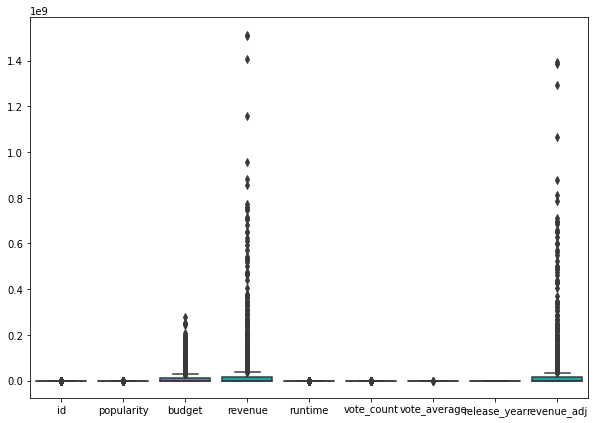

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, color='c')

In [34]:
Q1_budget= df['budget'].quantile(0.25)
Q3_budget= df['budget'].quantile(0.75)

In [35]:
rbudget= Q3_budget-Q1_budget

In [36]:
maxB = Q3_budget+(1.5*rbudget)
minB = Q1_budget-(1.5*rbudget)

In [37]:
for x in ['budget']:
    df.loc[df[x] < minB,x] = df['budget'].mean()
    df.loc[df[x] > maxB,x] = df['budget'].mean()

In [38]:
Q1_revenue = df['revenue'].quantile(0.25)
Q3_revenue= df['revenue'].quantile(0.75)

In [39]:
rrevenue= Q3_revenue-Q1_revenue

In [40]:
maxR = Q3_revenue+(1.5*rrevenue)
minR = Q1_revenue-(1.5*rrevenue)

In [41]:
for x in ['revenue']:
    df.loc[df[x] < minR,x] = df['revenue'].mean()
    df.loc[df[x] > maxR,x] = df['revenue'].mean()

In [42]:
Q1_revenue_adj = df['revenue_adj'].quantile(0.25)
Q3_revenue_adj= df['revenue_adj'].quantile(0.75)

In [43]:
rrevenue_adj= Q3_revenue_adj-Q1_revenue_adj

In [44]:
maxA = Q3_revenue_adj+(1.5*rrevenue_adj)
minA = Q1_revenue_adj-(1.5*rrevenue_adj)

In [45]:
for x in ['revenue_adj']:
    df.loc[df[x] < minA,x] = df['revenue_adj'].mean()
    df.loc[df[x] > maxA,x] = df['revenue_adj'].mean()

<AxesSubplot:>

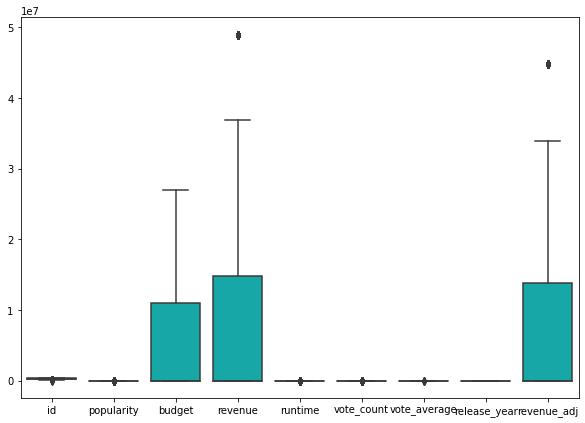

In [46]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, color='c')

>>Finally it's clean

> **Note that**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. 

> Make sure that you keep your reader informed on the steps that you are taking in your Analysis and Visualization. 
### Data Cleaning (Replace this with more specific notes!)

>first of all I've checked if their is any dublicates data and then I deleted them

>secondly I found many missing values and worked on it by deleting , filling & replacing any nan values 

>finally I checked again that their is nothing of the missing values and the data became cleaned 

<a id='eda'></a>
## Exploratory Data Analysis

>  Now that you've cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section , and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most popular from year to year?)

In [47]:
df['genres'].value_counts()

Drama                                      104
Comedy                                      63
Horror                                      42
Documentary                                 40
Drama|Comedy                                27
                                          ... 
TV Movie|Action|Science Fiction              1
Science Fiction|Drama|Family                 1
Adventure|Action|Comedy|Science Fiction      1
Animation|Music|Family                       1
Science Fiction|Adventure|Comedy             1
Name: genres, Length: 376, dtype: int64

> Drama movies is the most popular type

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [48]:
np.max(df['revenue'])

48934493.22032193

In [49]:
df[df['revenue']==28883511.0]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
733,87093.0,tt1126590,1.398713,10000000.0,28883511.0,Big Eyes,Amy Adams|Christoph Waltz|Krysten Ritter|Danny...,not available,Tim Burton,She created it. He sold it. And they bought it.,...,A drama centered on the awakening of the paint...,105.0,Drama,The Weinstein Company|Silverwood Films|Electri...,12/24/2014,710.0,6.8,2014.0,9210910.508,26604343.5


In [50]:
df.sort_values(['revenue'],ascending = False)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397.0,tt0369610,32.985763,1.498586e+07,4.893449e+07,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562.0,6.5,2015.0,137999939.3,4.483494e+07
674,53182.0,tt1253863,2.979181,1.498586e+07,4.893449e+07,300: Rise of an Empire,Sullivan Stapleton|Eva Green|Lena Headey|Calla...,http://www.300themovie.com/,Noam Murro,Seize your glory!,...,Based on Frank Miller's latest graphic novel X...,102.0,Action|War,Legendary Pictures|Hollywood Gang Productions|...,3/5/2014,1664.0,6.1,2014.0,101320015.6,4.483494e+07
663,82702.0,tt1646971,3.489106,1.498586e+07,4.893449e+07,How to Train Your Dragon 2,Jay Baruchel|Gerard Butler|Kristen Wiig|Jonah ...,http://www.howtotrainyourdragon.com/,Dean DeBlois,The training is over.,...,The thrilling second chapter of the epic How T...,102.0,Fantasy|Action|Adventure|Animation|Comedy,DreamWorks Animation|Mad Hatter Entertainment,6/12/2014,2152.0,7.7,2014.0,133558202.4,4.483494e+07
665,138103.0,tt2333784,3.346250,1.498586e+07,4.893449e+07,The Expendables 3,Sylvester Stallone|Jason Statham|Harrison Ford...,http://theexpendables3film.com/,Patrick Hughes,New team. New attitude. New mission.,...,"Barney, Christmas and the rest of the team com...",127.0,Action|Adventure|Thriller,Davis-Films|Nu Image Films|LionsGate|Millenniu...,8/4/2014,1275.0,6.2,2014.0,82898194.57,4.483494e+07
141,328589.0,tt3722070,1.142518,6.000000e+06,4.893449e+07,The Lady in the Van,Maggie Smith|Alex Jennings|Frances de la Tour|...,http://www.bbc.co.uk/bbcfilms/film/the_lady_in...,Nicholas Hytner,A mostly true story,...,The true story of the relationship between Ala...,104.0,Comedy|Drama,BBC Films|TriStar Productions,11/13/2015,135.0,5.9,2015.0,5519997.571,4.483494e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,321640.0,tt4299972,0.033378,0.000000e+00,0.000000e+00,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,not available,Andrew Jarecki,Four Decades. Three Murders. And One Very Rich...,...,"Robert Durst, scion of one of New Yorkâ€™s bil...",240.0,Documentary,Blumhouse Productions|Hit the Ground Running F...,2/8/2015,72.0,8.4,2015.0,0.0,0.000000e+00
610,309919.0,tt1772261,0.056244,2.000000e+06,0.000000e+00,The Curse of Downers Grove,Bella Heathcote|Lucas Till|Helen Slater|Penelo...,not available,Derick Martini,High school can be murder.,...,The town of Downers Grove looks like your aver...,89.0,Thriller|Mystery|Horror|Drama,Myriad Pictures|AliBella Pictures|Bystander Fi...,8/21/2015,11.0,4.2,2015.0,1839999.19,0.000000e+00
611,303867.0,tt4171032,0.032678,0.000000e+00,0.000000e+00,World of Tomorrow,Julia Pott|Winona Mae,http://bitterfilms.com,Don Hertzfeldt,not available,...,A little girl is contacted by a mysterious woman.,17.0,Animation|Comedy|Science Fiction,Bitter Films,3/31/2015,47.0,8.2,2015.0,0.0,0.000000e+00
612,325365.0,tt1421361,0.030819,0.000000e+00,0.000000e+00,Dawg Fight,Dhafir Harris,http://www.dawg-fight.com,Billy Corben,not available,...,"In a crime-plagued neighborhood near Miami, br...",109.0,Documentary,Rakontur,3/13/2015,17.0,6.4,2015.0,0.0,0.000000e+00


>I think most of them are from drama type and they are between 2014 & 2015

### Research Question 3  (How many movies were made in 2020 and have a rating greater than six  ?)

In [51]:
df[(df['vote_average']==6.0) & (df['release_year']==2014.0)]['original_title'].count()

11

### Research Question 4  (what is the correlation between the variables?)

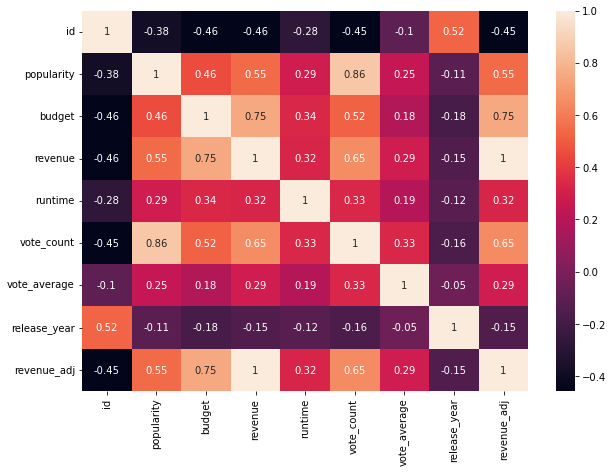

In [52]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True );

### Research Question 5 (what is the distribution of the ratings?)

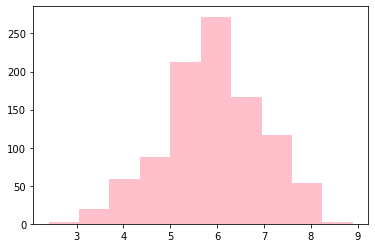

In [53]:
plt.hist(df['vote_average'],color ='pink')
plt.show()

### Research Question 6 (which movies have budget  more than the revenue? & what is the rate of it?)

In [54]:
df[df.budget > df.revenue]['original_title']

48                            Wild Card
67                             Survivor
84                              Tracers
87                               Maggie
89                             Child 44
                     ...               
983                 The Grand Seduction
985                                 Joe
986              Let's Kill Ward's Wife
994                           Free Fall
996    Angry Video Game Nerd: The Movie
Name: original_title, Length: 151, dtype: object

In [55]:
df[df.budget > df.revenue]['vote_average'].sort_values(ascending=False)

718    8.0
159    7.7
291    7.5
485    7.4
570    7.4
      ... 
688    4.0
970    3.8
184    3.6
874    3.3
586    3.3
Name: vote_average, Length: 151, dtype: float64

### Research Question 7 (what is the distribution of revenue)

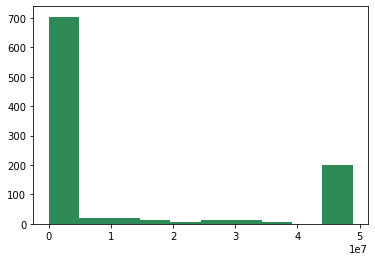

In [56]:
plt.hist(df['revenue'],color ='seagreen')
plt.show()

### Research Question 8 ( what is the correlation between release year & vote average? & which movie have the greateast rate?)

In [57]:
df['release_year'].corr(df['vote_average'])


-0.050230383684987855

In [58]:
max(df['vote_average'])

8.9

In [59]:
df[df['vote_average']==8.9]['original_title']

538    The Mask You Live In
Name: original_title, dtype: object

### Research Question 9 (Data visualization,visualize the distribution of genres for all titles)

<AxesSubplot:>

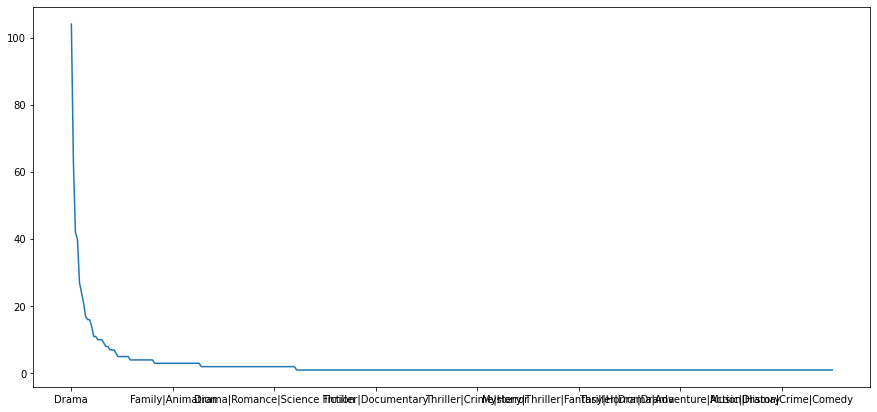

In [60]:
types=df['genres'].value_counts()
types.plot(figsize=(15,7))

### Research Question 10 ( In 2015, did netflix release more  drama movies or comedy?)

In [61]:
df[df['release_year']==2015]['genres'].value_counts()

Drama                               59
Documentary                         37
Comedy                              36
Horror                              29
Drama|Comedy                        16
                                    ..
Western|Drama                        1
Fantasy|Horror                       1
Comedy|Music|War                     1
Mystery|Science Fiction|Thriller     1
Comedy|Drama|Family                  1
Name: genres, Length: 272, dtype: int64

## Split the data to train & test

In [62]:
x=df[['vote_count','popularity','budget']]
y=df['revenue']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## Multiple Regression Model

In [63]:
regr = linear_model.LinearRegression()
fitt=regr.fit(x_train, y_train)
predictrate1 = regr.predict(x_test)
print(predictrate1)
print(y_test)

[41333507.84338939 21602553.44240539  1405263.3756851   1403652.98149758
  1480334.20806869  1282691.54472318  5456914.1430385  32988943.97612133
 29010511.08397131  1510411.19137588  3956551.42555549  1638208.06151134
  1066963.30898441 40540986.1915445   1264243.50261388  1658273.10789807
 46657156.94928781  1293869.07728426  5518996.16150096  1580687.15546462
  1625325.73717418  3119707.30967384  2633441.86682465  9279750.96170477
  1344041.52709574  1966310.05664116  1532792.85943816  1414263.83936466
 11442521.6075387   6763834.54234603  2061392.86191705  1303450.83229389
 21543671.66087574 55358867.10706656  1367507.77597037  1552993.46492711
 57119486.21404003 43762023.20707624  1521231.3824992   1734268.34486545
 22299146.82142885  1006846.39754355  1473783.77154406  1371581.23284791
 33639594.31503967 40471888.05480865  1426888.04793603  1251766.2169948
 38603632.90203552  3731316.27793746  6747548.51117268  1300994.36866163
 11953300.55746712 36188346.22408758  1319195.970082

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, predictrate1)

0.6975712193624857

> that is mean that the model is accurate by 70%

<a id='conclusions'></a>
## Conclusions

1. From the analysis we found that the relation between popularity & the vote_average is the most stronge in this data as the correlation between them is equal 0.86 and the relation between vote_average and release year is very weak s the correlation between them is equal to -0.05
2. the properties of movies with high revenue are the budget nearly equal to (1.498586e+07) and the release year is between 2014 & 2015 and about type of movies is drama
3. The financial loss of the movie does not necessarily mean that it received a bad rating. Through data analysis, we saw a movie that cost more than its revenue, yet its rating is 8.0.
4. From graphs the distribution of vote average is normal and the graph of revenue& genres are skewd to left
5. and then the regression model between x , y is accurate by 70%
